# (Hyper)parameter search

<img src="grid_vs_random.jpeg">

## Kaggle [Gender Recognition by Voice]
- https://www.kaggle.com/primaryobjects/voicegender

### Kernel을 참조하여 데이터 전처리 및 시각화를 진행함
- https://www.kaggle.com/sushanthiray/d/primaryobjects/voicegender/experimenting-with-neural-networks-in-tensorflow/notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
from pprint import pprint

In [2]:
df = pd.read_csv('data/voice.csv')
df.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

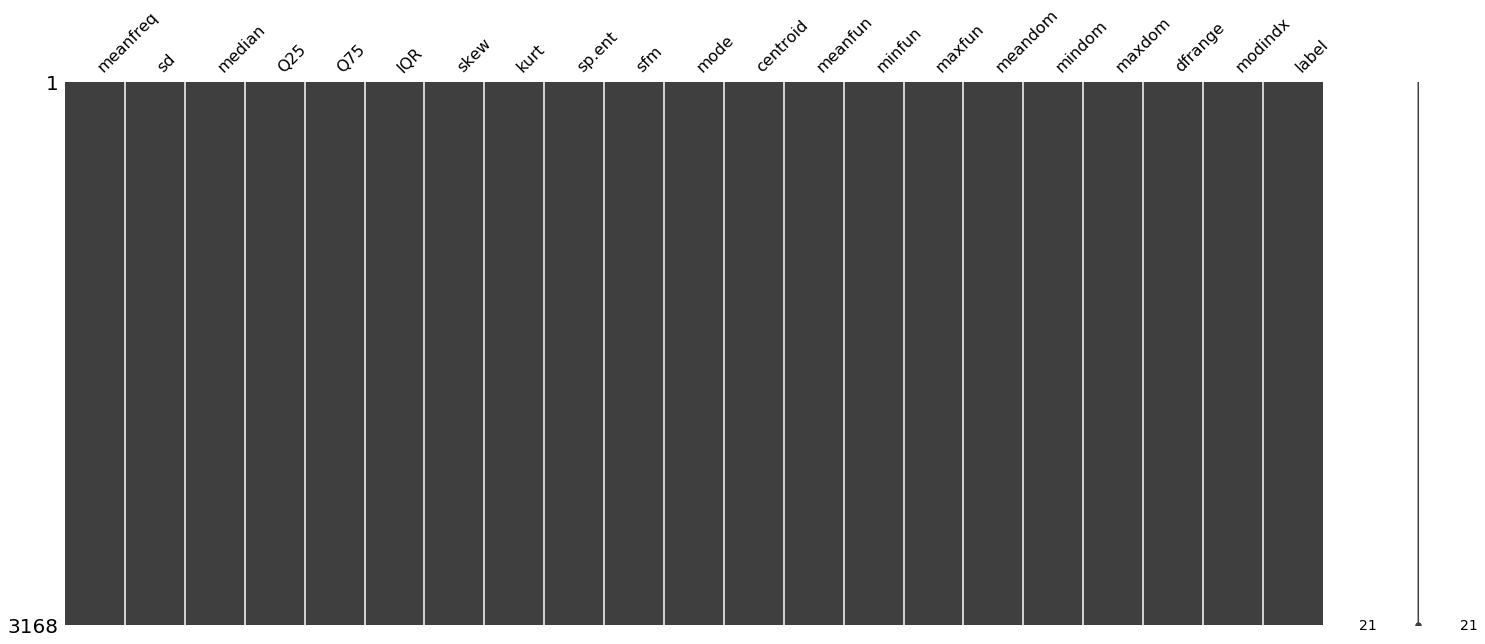

In [3]:
# Check whether missing values exist
msno.matrix(df)

In [4]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

## Train / Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [6]:
# Training 80%, Test 20%
print(X_train.shape)
print(X_test.shape)

(2534, 20)
(634, 20)


# GridSearchCV vs. RandomizedSearchCV

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

분류기를 `RandomForestClassifier`로 수행하고 다음 두 가지 하이퍼파라미터를 탐색해봅시다.
- 나무의 갯수 (n_estimators)
- 각 나무의 변수 선택 수 (max_features)

## GridSearchCV
- 미리 설계한 Parameter set 후보들을 모두 탐색


In [8]:
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_features': ['auto', 'log2']
}

In [9]:
gridsearch = GridSearchCV(estimator=RandomForestClassifier(random_state=1234), param_grid=param_grid, cv=3, verbose=1)
gridsearch.fit(X_train, y_train)                          

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    5.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [10]:
print(len(gridsearch.grid_scores_))
pprint(gridsearch.grid_scores_)

20
[mean: 0.97159, std: 0.00192, params: {'max_features': 'auto', 'n_estimators': 5},
 mean: 0.97672, std: 0.00565, params: {'max_features': 'auto', 'n_estimators': 10},
 mean: 0.97474, std: 0.00620, params: {'max_features': 'auto', 'n_estimators': 15},
 mean: 0.97553, std: 0.00565, params: {'max_features': 'auto', 'n_estimators': 20},
 mean: 0.97593, std: 0.00698, params: {'max_features': 'auto', 'n_estimators': 25},
 mean: 0.97553, std: 0.00557, params: {'max_features': 'auto', 'n_estimators': 30},
 mean: 0.97672, std: 0.00590, params: {'max_features': 'auto', 'n_estimators': 35},
 mean: 0.97711, std: 0.00456, params: {'max_features': 'auto', 'n_estimators': 40},
 mean: 0.97632, std: 0.00537, params: {'max_features': 'auto', 'n_estimators': 45},
 mean: 0.97632, std: 0.00537, params: {'max_features': 'auto', 'n_estimators': 50},
 mean: 0.97159, std: 0.00192, params: {'max_features': 'log2', 'n_estimators': 5},
 mean: 0.97672, std: 0.00565, params: {'max_features': 'log2', 'n_estimator

/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [11]:
print(gridsearch.best_params_)
print(gridsearch.best_score_)

{'max_features': 'auto', 'n_estimators': 40}
0.9771112865035517


## RandomizedSearchCV
- 미리 설계한 Parameter set 후보들 중 몇 개를 랜덤으로 선택

In [12]:
param_grid = {
    'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
    'max_features': ['auto', 'log2']
}

In [13]:
randsearch = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1234), param_distributions=param_grid, cv=3, n_iter=8, verbose=1)
randsearch.fit(X_train, y_train)                          

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.4s finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=8, n_jobs=1,
          param_distributions={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': ['auto', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [14]:
print(len(randsearch.grid_scores_))
pprint(randsearch.grid_scores_)

8
[mean: 0.97672, std: 0.00590, params: {'n_estimators': 35, 'max_features': 'auto'},
 mean: 0.97553, std: 0.00565, params: {'n_estimators': 20, 'max_features': 'auto'},
 mean: 0.97553, std: 0.00565, params: {'n_estimators': 20, 'max_features': 'log2'},
 mean: 0.97593, std: 0.00698, params: {'n_estimators': 25, 'max_features': 'auto'},
 mean: 0.97553, std: 0.00557, params: {'n_estimators': 30, 'max_features': 'log2'},
 mean: 0.97632, std: 0.00537, params: {'n_estimators': 45, 'max_features': 'log2'},
 mean: 0.97159, std: 0.00192, params: {'n_estimators': 5, 'max_features': 'log2'},
 mean: 0.97632, std: 0.00537, params: {'n_estimators': 45, 'max_features': 'auto'}]


/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [16]:
print(randsearch.best_params_)
print(randsearch.best_score_)

{'n_estimators': 35, 'max_features': 'auto'}
0.9767166535122336


## RandomizedSearchCV
- 하이퍼파라미터에 분포를 제시하는 것도 가능함
- 여기서는 `scipy.stats.randint`을 이용

In [17]:
from scipy.stats import randint

In [18]:
param_grid = {
    'n_estimators': randint(low=5, high=50),
    'max_features': ['auto', 'log2']
}

In [19]:
randsearch_v2 = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=1234), param_distributions=param_grid, cv=5, n_iter=10, verbose=1)
randsearch_v2.fit(X_train, y_train)                          

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    6.7s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a26840278>, 'max_features': ['auto', 'log2']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [20]:
print(len(randsearch_v2.grid_scores_))
pprint(randsearch_v2.grid_scores_)

10
[mean: 0.97435, std: 0.00660, params: {'max_features': 'auto', 'n_estimators': 21},
 mean: 0.97711, std: 0.00606, params: {'max_features': 'auto', 'n_estimators': 35},
 mean: 0.97790, std: 0.00641, params: {'max_features': 'log2', 'n_estimators': 41},
 mean: 0.97711, std: 0.00765, params: {'max_features': 'log2', 'n_estimators': 47},
 mean: 0.97632, std: 0.00738, params: {'max_features': 'auto', 'n_estimators': 30},
 mean: 0.97711, std: 0.00666, params: {'max_features': 'auto', 'n_estimators': 43},
 mean: 0.97751, std: 0.00667, params: {'max_features': 'log2', 'n_estimators': 32},
 mean: 0.97632, std: 0.00738, params: {'max_features': 'log2', 'n_estimators': 30},
 mean: 0.97040, std: 0.00430, params: {'max_features': 'log2', 'n_estimators': 5},
 mean: 0.97869, std: 0.00743, params: {'max_features': 'auto', 'n_estimators': 48}]


/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)
/Users/kth/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [21]:
print(randsearch_v2.best_params_)
print(randsearch_v2.best_score_)

{'max_features': 'auto', 'n_estimators': 48}
0.978689818468824


분포를 사용할 때에는`rvs` method가 있는 `scipy.stats.distributions`를 사용하는 것을 추천

예시
- `scipy.stats.randint`
- `scipy.stats.uniform`
- `scipy.stats.norm`
- ...